In [167]:
import pandas as pd
import joblib


In [168]:
X_train = pd.read_csv("/Users/josetudela/Projects/EligeTuVino/eligetuvino/data/datasets/processed/X_train_imputed.csv")
y_train = pd.read_csv("/Users/josetudela/Projects/EligeTuVino/eligetuvino/data/datasets/processed/y_train.csv")
X_test = pd.read_csv("/Users/josetudela/Projects/EligeTuVino/eligetuvino/data/datasets/processed/X_test_imputed.csv")
y_test = pd.read_csv("/Users/josetudela/Projects/EligeTuVino/eligetuvino/data/datasets/processed/y_test.csv")

df_final_tintos_corregido = pd.read_csv("/Users/josetudela/Projects/EligeTuVino/eligetuvino/data/datasets/raw/FINAL_DF_TINTOS_PRECIO_CORREGIDO.csv")

In [169]:
X_train["Valoración"] = y_train["Valoración"]

In [170]:
X_test["Valoración"] = y_test["Valoración"]

In [171]:
df_total =  pd.concat([X_train, X_test], ignore_index=True)

In [172]:
df_total["ID"] = df_total["ID"].astype(int)
df_total["Precio"] = df_total["Precio"].astype(float)

In [173]:
df_total

,Unnamed: 0,ID,Precio,Contenido de alcohol,Ligero/Poderoso,Suave/Tánico,Seco/Dulce,Débil/Ácido,Aves,Carneadobada,...,Rondinella,Sangiovese,Shiraz/Syrah,Tempranillo,TourigaNacional,Zweigelt,Bodega_encoded,País_encoded,Región_encoded,Valoración
0,0,1128968,360.00,13.0,4.7,3.5,1.2,7.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.091467,3.993496,4.015772,4.3
1,1,1478235,13.48,10.4,8.2,4.9,1.5,5.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.943400,3.860383,4.112247,3.9
2,2,3146052,4.48,5.0,5.5,3.4,1.6,4.1,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.847754,3.860383,3.644701,3.5
3,3,6181943,42.50,5.0,2.0,2.2,0.1,7.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.947346,3.880002,3.826174,4.0
4,4,1169092,41.50,13.0,4.8,5.7,0.8,6.3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.951733,3.953857,4.253210,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20151,4027,1241518,23.26,14.0,6.8,4.2,1.4,1.9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.883709,3.953857,3.828832,3.7
20152,4028,3416054,22.50,13.0,4.6,4.6,1.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.951733,3.953857,4.061835,3.8
20153,4029,5726850,16.00,14.0,4.7,4.7,1.7,5.2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.916985,3.860383,3.952083,3.8
20154,4030,4305839,10.99,14.0,8.5,4.7,0.9,4.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.918400,3.860383,3.844123,3.8


In [174]:
df_total_cluster = df_total.drop(columns=["Unnamed: 0","ID","Precio"])

In [175]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # Crear el escalador
df_total_scaled = pd.DataFrame(scaler.fit_transform(df_total_cluster), columns=df_total_cluster.columns)  # Aplicar

df_total_scaled.head()  # Ver los primeros valores escalados

,Contenido de alcohol,Ligero/Poderoso,Suave/Tánico,Seco/Dulce,Débil/Ácido,Aves,Carneadobada,Carnedecaza,Cerdo,Champiñones,...,Rondinella,Sangiovese,Shiraz/Syrah,Tempranillo,TourigaNacional,Zweigelt,Bodega_encoded,País_encoded,Región_encoded,Valoración
0,0.121212,0.552941,0.411765,0.193548,0.867470,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.572556,0.557202,0.612367,0.791667
1,0.094949,0.964706,0.576471,0.241935,0.650602,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.347616,0.261813,0.743799,0.625000
2,0.040404,0.647059,0.400000,0.258065,0.469880,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.202312,0.261813,0.106843,0.458333
3,0.040404,0.235294,0.258824,0.016129,0.867470,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.353610,0.305350,0.354071,0.666667
4,0.121212,0.564706,0.670588,0.129032,0.734940,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.360276,0.469239,0.935839,0.750000


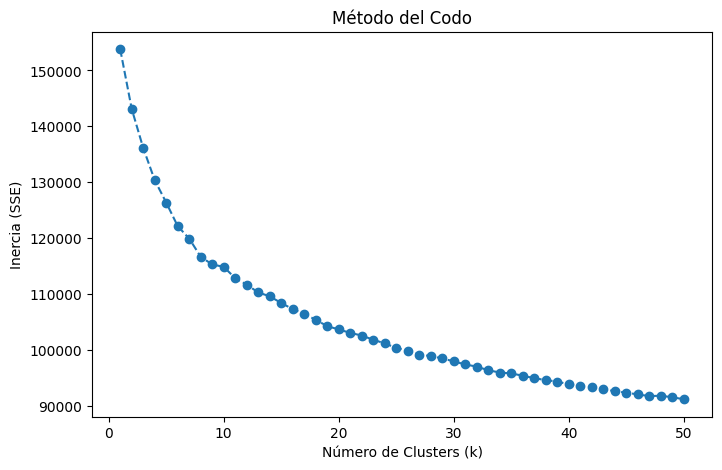

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Probar diferentes valores de k
inertia = []
K_range = range(1, 51)  # Probar entre 1 y 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_total_scaled)  # df = tu DataFrame con datos numéricos
    inertia.append(kmeans.inertia_)  # Guardar inercia

# Graficar la curva del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Método del Codo')
plt.show()

In [178]:


from sklearn.cluster import KMeans

model_KM = KMeans(n_clusters = 75, random_state = 42)
model_KM.fit(df_total_scaled)

predictions = model_KM.predict(df_total_scaled)

predictions

array([46, 61, 14, ...,  7, 58, 44], shape=(20156,), dtype=int32)

In [202]:
joblib.dump(model_KM, "kmeans_model.pkl")

['kmeans_model.pkl']

In [180]:
df_total["cluster"] = predictions

In [182]:
df_final_tintos_corregido[df_final_tintos_corregido["ID"] == "43974"]["Precio"] = 320

/var/folders/79/fd_qzfk141g8svblsrdwccqr0000gn/T/ipykernel_2365/1151951066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_tintos_corregido[df_final_tintos_corregido["ID"] == "43974"]["Precio"] = 320


In [195]:
input ="https://www.vivino.com/ES/es/vega-sicilia-unico-reserva-especial-edicion/w/77136"

In [196]:
id = df_final_tintos_corregido.loc[df_final_tintos_corregido["Url"] == input, "ID"].values[0]
id = int(id)
print(id)


77136


In [197]:
cluster = df_total[df_total["ID"] == id]["cluster"].iloc[0]
print(cluster)  # Salida: 8

49


In [198]:
# Obtener el índice de la fila con el precio más bajo
indice_min_precio = df_total[df_total["cluster"] == cluster]["Precio"].idxmin()


# Obtener la fila completa con ese índice
fila_min_precio = df_total.loc[indice_min_precio]

df_final_tintos_corregido[df_final_tintos_corregido["ID"] == fila_min_precio["ID"].astype(int).astype(str)]["Url"]

2248    https://www.vivino.com/ES/es/bodegas-paco-mulero-prisma-garnacha/w/7273354
Name: Url, dtype: object

In [200]:
limite_precio = 50
df_total_limite_precio = df_total[df_total["Precio"] < limite_precio]
indice_max_valoración = df_total_limite_precio[df_total_limite_precio["cluster"] == cluster]["Valoración"].idxmax()
fila_max_valoracion = df_total.iloc[indice_max_valoración]
df_final_tintos_corregido[df_final_tintos_corregido["ID"] == fila_max_valoracion["ID"].astype(int).astype(str)]["Url"]

11876    https://www.vivino.com/ES/es/dominio-del-bendito-el-titan-del-bendito/w/1133062
Name: Url, dtype: object